# GRID MOVEMENT
Given a $n \times n$ square grid, containing a randomly placed resource $r$, implement as python classes a set of agents moving over the grid with different movement strategies.

The agents do not know the position of the resource. All the agents starts from the very same position on the grid. The exercize requires to:
- Play several research quests in which the agents search for the resource by moving on the grid
- Maintain a statistics of how they perform the search (i.e., how many moves are needed to find the resource) according to the distance of the resource from the starting point.
- Plot the grid, the agents, and the resource during play
- Plot the statistical performances

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time
import pandas as pd


class Grid(object):
    
    def __init__(self, n):
        self.n = n
        self.r = (np.random.randint(n), np.random.randint(n))
    
    def plot(self, ax):
        X, Y = [], []
        for x in range(self.n):
            for y in range(self.n):
                X.append(x)
                Y.append(y)
        ax.scatter(X, Y, marker='s', s=800, facecolors='none', edgecolors='#666666')
        ax.scatter(self.r[0], self.r[1], marker='s', s=800, c='#FF0000')


class Agent(object):
    
    def __init__(self, grid):
        self.pos = (0, 0)
        self.grid = grid
        self.trials = 0
        self.res = False
        
    def plot(self, ax):
        ax.scatter(self.pos[0], self.pos[1], alpha=0.4)
    
    def search(self):
        self.trials += 1
        if self.pos == self.grid.r:
            self.res = True
    
    def move(self):
        pass

class Linear(Agent):
    
    name = 'linear'

    def __init__(self, grid):
        self.name = Linear.name
        super(Linear, self).__init__(grid)
    
    def move(self):
        if self.pos[0] + 1 < self.grid.n:
            self.pos = (self.pos[0] + 1, self.pos[1])
        elif self.pos[1] + 1 < self.grid.n:
            self.pos = (0, self.pos[1] + 1)
        else:
            self.pos = (0, 0)
            
class Random(Agent):
    
    name = 'random'

    def __init__(self, grid):
        self.name = Random.name
        super(Random, self).__init__(grid)
    
    def move(self):
        self.pos = ((np.random.randint(self.grid.n), np.random.randint(self.grid.n)))

class SemiRandom(Agent):
    
    name = 'semirandom'
    
    def __init__(self, grid, seed=0.2):
        self.seed = seed
        self.name = SemiRandom.name
        super(SemiRandom, self).__init__(grid)
    
    def move(self):
        if np.random.uniform() < self.seed:
            self.pos = ((np.random.randint(self.grid.n), np.random.randint(self.grid.n)))
        else:
            if self.pos[0] + 1 < self.grid.n:
                self.pos = (self.pos[0] + 1, self.pos[1])
            elif self.pos[1] + 1 < self.grid.n:
                self.pos = (0, self.pos[1] + 1)
            else:
                self.pos = (0, 0)

In [ ]:
g = Grid(8)
l = Linear(g)
r = Random(g)
agents = [l, r]

In [ ]:
for iteration in range(10):
    fig, ax = plt.subplots(figsize=(6, 6))
    g.plot(ax)
    moves = len(agents)
    for agent in agents:
        agent.plot(ax)
        if not agent.res:
            agent.search()
            agent.move()
            moves -= 1
    plt.axis('off')
    plt.show()
    clear_output(wait=True)
    time.sleep(0.5)
    if moves == len(agents):
        break

In [10]:
def play(g, agents, max_it=1000):
    for iteration in range(max_it):
        moves = len(agents)
        for agent in agents:
            if not agent.res:
                agent.search()
                agent.move()
                moves -= 1
        if moves == len(agents):
            break
    return np.sqrt(g.r[0]**2 + g.r[1]**2), [(x.name, x.trials) for x in agents] 

In [ ]:
play(g, agents)

In [11]:
def multiple(size, plays, agentclasses):
    P = {'distance': []}
    for a in agentclasses:
        P[a.name] = []
    for p in range(plays):
        g = Grid(size)
        agents = []
        for a in agentclasses:
            agent = a(g)
            agents.append(agent)
        d, outcomes = play(g, agents)
        P['distance'].append(d)
        for n, v in outcomes:
            P[n].append(v)
    return P

In [12]:
ac = [Linear, SemiRandom, Random]
data = multiple(20, 200, ac)

In [13]:
D = pd.DataFrame(data)

In [14]:
D.corr()

,distance,linear,semirandom,random
distance,1.000000,0.722549,0.070919,0.023634
linear,0.722549,1.000000,0.060930,0.068835
semirandom,0.070919,0.060930,1.000000,0.041800
random,0.023634,0.068835,0.041800,1.000000


In [15]:
D.mean()

distance       14.205383
linear        194.720000
semirandom    390.555000
random        339.485000
dtype: float64

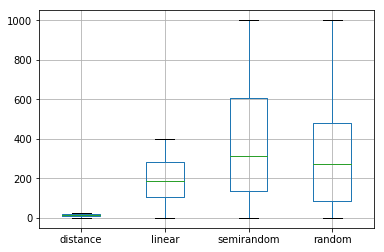

In [16]:
D.boxplot()
plt.show()

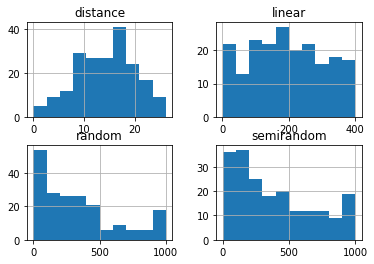

In [17]:
D.hist()
plt.show()

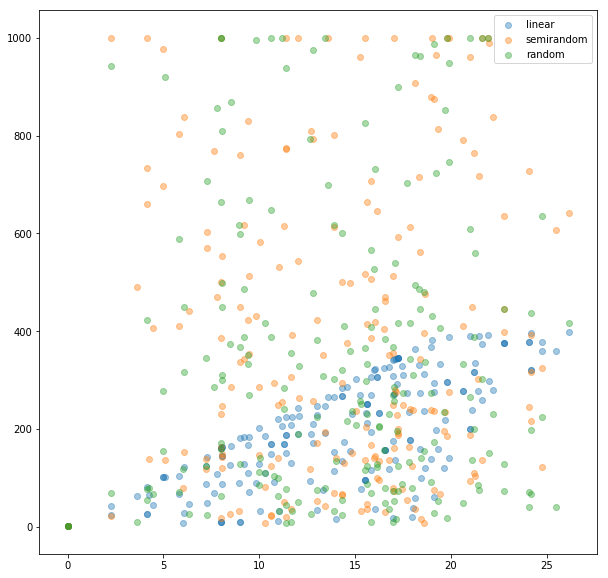

In [19]:
fig, ax = plt.subplots(figsize=(10, 10))
for agentclass in ac:
    ax.scatter(D.distance.values, D[agentclass.name].values, 
                alpha=0.4, label=agentclass.name)
ax.legend()
plt.show()